In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
land  = pd.read_csv("/mnt/e/bootcamp/Project/azmmon_farz/land_data_cleaned.csv") 
price = pd.read_csv("/mnt/e/bootcamp/Project/azmmon_farz/total_price.csv")

# Add price column
land["price_value"] = price["total_price"]

# Pick top 3 categories
top3 = land["cat3_slug"].value_counts().index[:3]
df = land[land["cat3_slug"].isin(top3)]


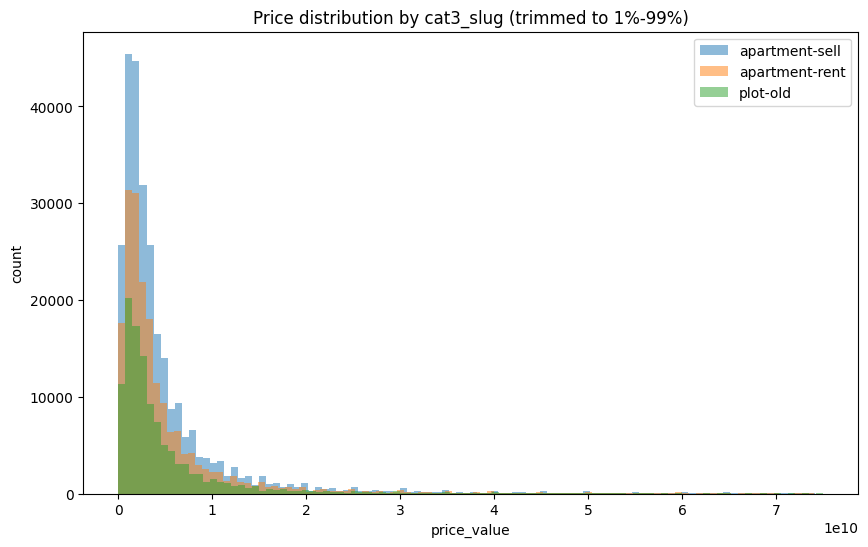

In [2]:
plt.figure(figsize=(10,6))

for cat in top3:
    subset = df[df["cat3_slug"] == cat]["price_value"]
    low, high = subset.quantile([0.01, 0.99])   # cut off extreme tails
    plt.hist(subset, bins=100, range=(low, high), alpha=0.5, label=cat)

plt.xlabel("price_value")
plt.ylabel("count")
plt.title("Price distribution by cat3_slug (trimmed to 1%-99%)")
plt.legend()
plt.show()
